In [57]:
import plotly.graph_objects as go
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx

# reading input log file
import math
import sys
import traceback
from csv import excel
from collections import Counter
from scipy import stats

image_path='../sankey_diagram/statistics/'

# DATASET = 'point_cloud'
# DATASET = 'contact_map'
DATASET = False

data_filter = {
    'datasets': [{'dset_name':'contact_map'},
    {'dset_name':'point_cloud'},
     ],
}

"""Index(['data_label_vol', 'object_idx_vol', 'dset_name', 'access_size_vol',
       'logical_addr_vol', 'op_type_vol', 'operation_vol', 'n_elements',
       'dimension_cnt', 'dimensions', 'file_intent', 'layout', 'time(us)_vol',
       'io_idx_vol', 'logical_addr_map', 'data_label_vfd', 'object_idx_vfd',
       'access_size_vfd', 'logical_addr_vfd', 'next_addr', 'op_type_vfd',
       'file_name', 'time(us)_vfd', 'operation_vfd', 'io_idx_vfd'],
      dtype='object')"""

"Index(['data_label_vol', 'object_idx_vol', 'dset_name', 'access_size_vol',\n       'logical_addr_vol', 'op_type_vol', 'operation_vol', 'n_elements',\n       'dimension_cnt', 'dimensions', 'file_intent', 'layout', 'time(us)_vol',\n       'io_idx_vol', 'logical_addr_map', 'data_label_vfd', 'object_idx_vfd',\n       'access_size_vfd', 'logical_addr_vfd', 'next_addr', 'op_type_vfd',\n       'file_name', 'time(us)_vfd', 'operation_vfd', 'io_idx_vfd'],\n      dtype='object')"

In [58]:
# data related methods
def humansize(nbytes):
    suffixes = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']
    i = 0
    while nbytes >= 1000 and i < len(suffixes)-1:
        nbytes /= 1000.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])

def check_empty(df,p=True):
    nan_df = df[df.isna().any(axis=1)].copy()
    if not nan_df.empty:
        if p:
            print(f"NaN rows: {nan_df}") # check any nan
        return list(nan_df.index)
    
    null_df = df[df.isnull().any(axis=1)].copy()
    if not null_df.empty:
        if p:
            print(f"NULL rows: {null_df}") # check any null
        return list(null_df.index)
    
def print_list_diff(list1, list2):
    if list1 == list2:
        print("same lists")
    else:
        print("different lists\nindex:\t[list1]\t[list2]")
        for index, (first, second) in enumerate(zip(list1, list2)):
            if first != second:
                # print(index, first, second)
                print(f"{index}:\t{first}]\t[{second}]")

def df_to_csv(df,file_name,suffix=''):
    # df.hash_id=df.hash_id.astype('category').cat.codes
    # out_csv=file_name.replace('prov-vfd-','')
    out_csv=file_name.replace('.csv',f'{suffix}.csv')
    df.to_csv(out_csv,index=False)
    
def read_data(filename, dset=''):
    if '.parquet' in filename:
        df = pd.read_parquet(filename,engine='pyarrow')
    if'.csv' in filename:
        df = pd.read_csv(filename,index_col=False)
    
    if len(dset) > 0:
        df = df[df['dset_name'] == dset]
        
    return df

def get_min_max_loc(G):
    ret_dict = {}
    attr_dict = nx.get_node_attributes(G,'pos')
    min_x = min(attr_dict.values())[0]
    max_x = max(attr_dict.values())[0]
    for k,v in attr_dict.items():
        if v[0] == min_x:
            ret_dict['min'] = { k:v }
        if v[0] == max_x:
            ret_dict['max'] = { k:v }
    return ret_dict

def plot_time_interval_dist(df):
    df = df.sort_values('io_idx_vol')
    df['time_interval_vol'] = df['time(us)_vol'].diff()
    

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    # Plot the first subplot with 'io_idx' on the x-axis and 'A' on the y-axis
    df.plot(x='io_idx_vol', y='time(us)_vol', kind='scatter', ax=ax1)
    ax1.set_title('time(us)_vol')

    df = df.sort_values('io_idx_vfd')
    df['time_interval_vfd'] = df['time(us)_vfd'].diff()

    # Plot the second subplot with 'io_idx' on the x-axis and 'B' on the y-axis
    df.plot(x='io_idx_vfd', y='time(us)_vfd', kind='scatter', ax=ax2)
    ax2.set_title('time(us)_vfd')

    # Plot a scatter plot on the first subplot with io_idx as x-axis and column A
    ax1.scatter(df['io_idx_vol'], df['time(us)_vol'], c=df['color'])
    ax1.set_xlabel('io_idx_vol')
    ax1.set_ylabel('time(us)_vol')

    # Plot a scatter plot on the second subplot with io_idx2 as x-axis and column B
    ax2.scatter(df['io_idx_vfd'], df['time(us)_vfd'], c=df['color'])
    ax2.set_xlabel('io_idx_vfd')
    ax2.set_ylabel('time(us)_vfd')

    # Display the plot
    plt.show()

/home/candicet233/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/home/candicet233/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


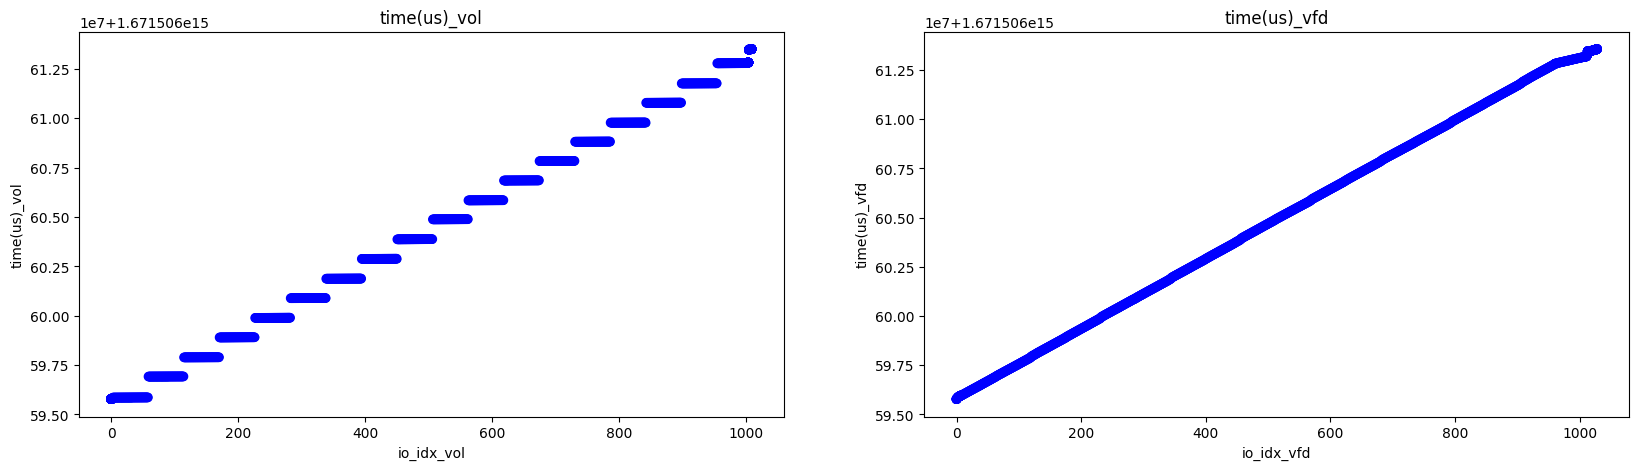

In [59]:
fsim='../sankey_diagram/dataframes/prov-vfd-sim-merged.csv'
df_sim_merged = read_data(fsim)
df_sim_merged['color'] = 'blue'
# print(df_sim_merged.columns)


plot_time_interval_dist(df_sim_merged)

/home/candicet233/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/home/candicet233/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


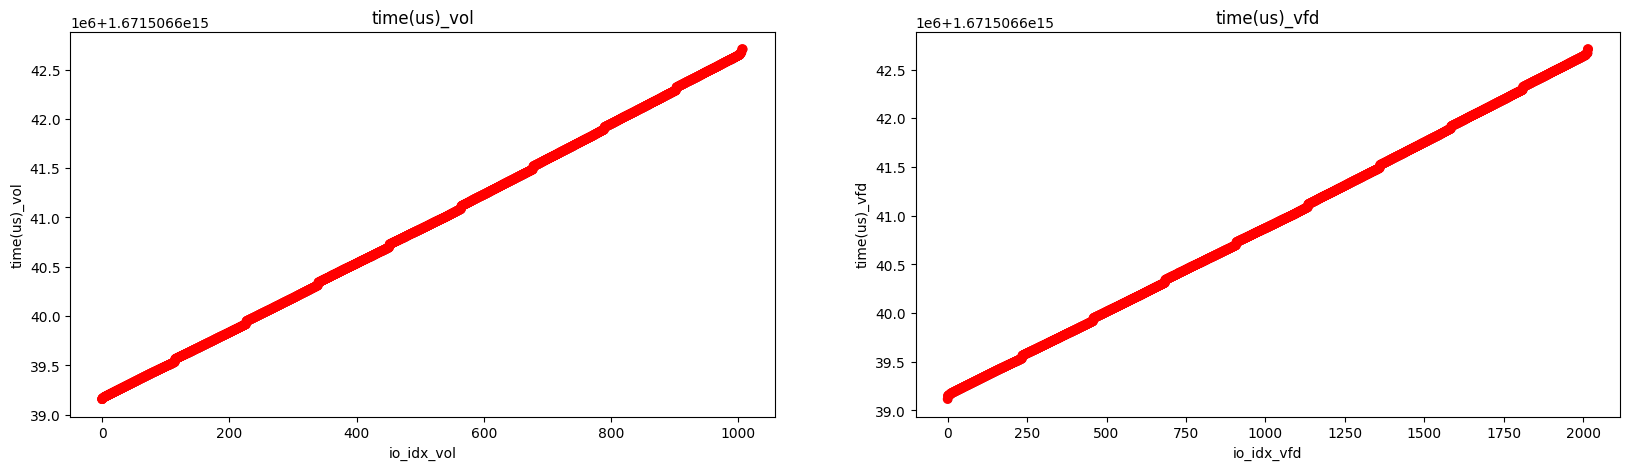

In [60]:
fagg_read='../sankey_diagram/dataframes/prov-vfd-agg-read-merged.csv'
df_agg_read_merged = read_data(fagg_read)
df_agg_read_merged['color'] = 'red'

plot_time_interval_dist(df_agg_read_merged)

/home/candicet233/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/home/candicet233/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


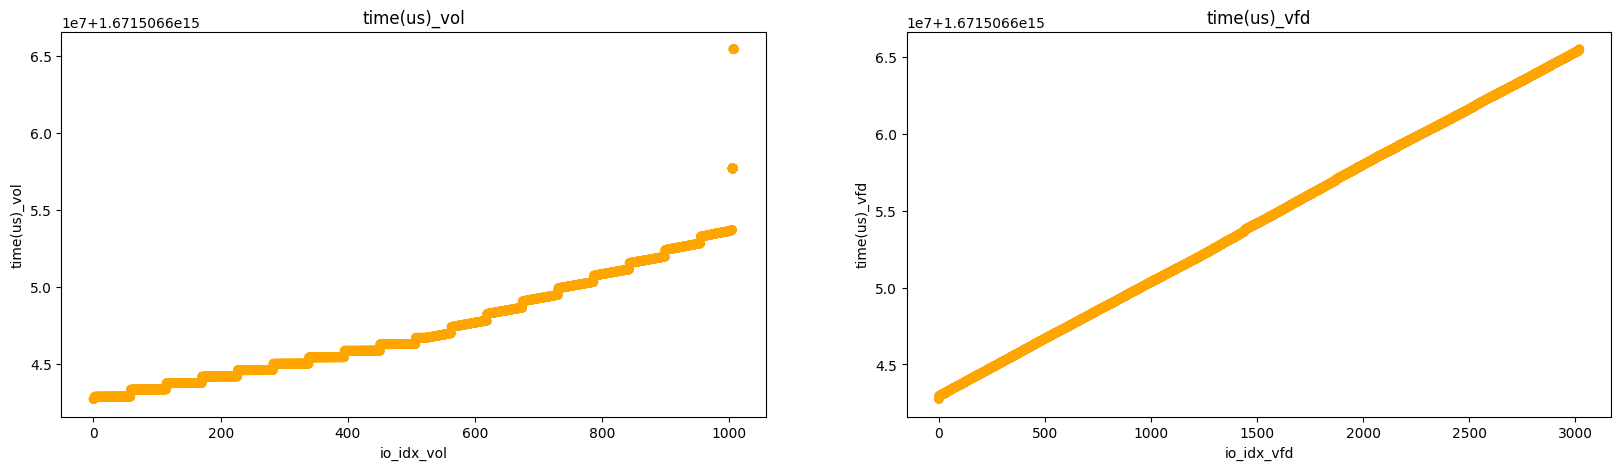

In [61]:
fagg_write='../sankey_diagram/dataframes/prov-vfd-agg-write-merged.csv'
df_agg_write_merged = read_data(fagg_write)
df_agg_write_merged['color'] = 'orange'

plot_time_interval_dist(df_agg_write_merged)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',

/home/candicet233/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/home/candicet233/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


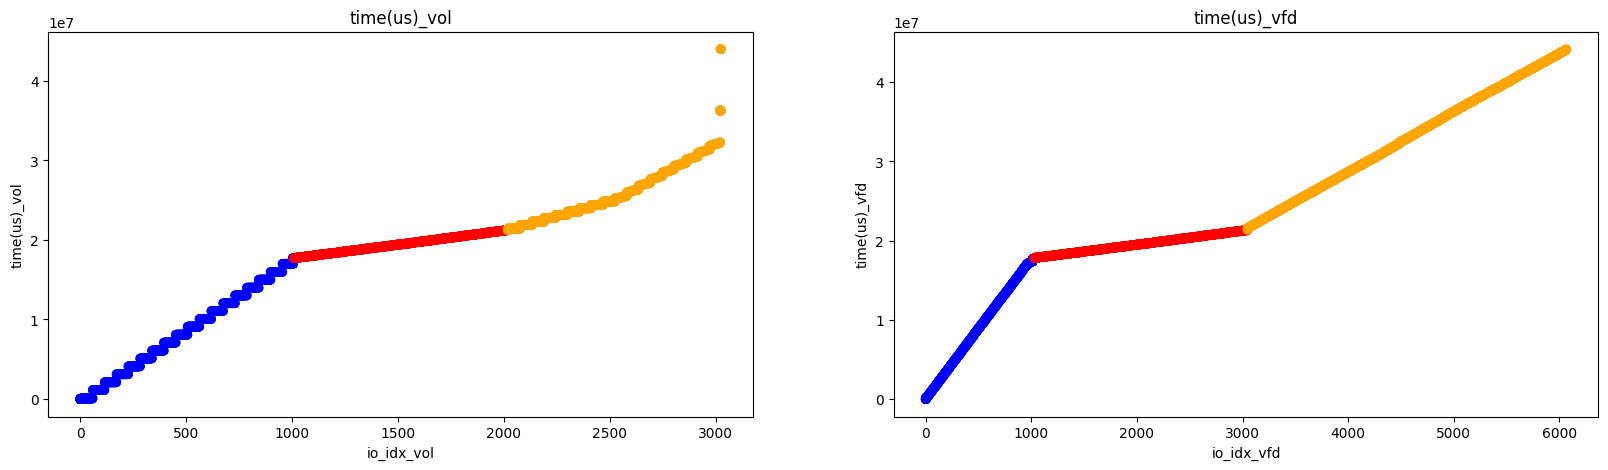

In [62]:
df_sim_merged['time(us)_vfd'] = df_sim_merged['time(us)_vfd'] - df_sim_merged['time(us)_vfd'].min()
df_agg_read_merged['time(us)_vfd'] = df_agg_read_merged['time(us)_vfd'] - df_agg_read_merged['time(us)_vfd'].min()
df_agg_write_merged['time(us)_vfd'] = df_agg_write_merged['time(us)_vfd'] - df_agg_write_merged['time(us)_vfd'].min()

df_sim_merged['time(us)_vol'] = df_sim_merged['time(us)_vol'] - df_sim_merged['time(us)_vol'].min()
df_agg_read_merged['time(us)_vol'] = df_agg_read_merged['time(us)_vol'] - df_agg_read_merged['time(us)_vol'].min()
df_agg_write_merged['time(us)_vol'] = df_agg_write_merged['time(us)_vol'] - df_agg_write_merged['time(us)_vol'].min()


df_agg_read_merged['io_idx_vfd'] = df_agg_read_merged['io_idx_vfd'] + df_sim_merged['io_idx_vfd'].max() +1
df_agg_write_merged['io_idx_vfd'] = df_agg_write_merged['io_idx_vfd'] + df_agg_read_merged['io_idx_vfd'].max() + 1

df_agg_read_merged['time(us)_vfd'] = df_agg_read_merged['time(us)_vfd'] + df_sim_merged['time(us)_vfd'].max() + 1
df_agg_write_merged['time(us)_vfd'] = df_agg_write_merged['time(us)_vfd'] + df_agg_read_merged['time(us)_vfd'].max() + 1

df_agg_read_merged['io_idx_vol'] = df_agg_read_merged['io_idx_vol'] + df_sim_merged['io_idx_vol'].max() +1
df_agg_write_merged['io_idx_vol'] = df_agg_write_merged['io_idx_vol'] + df_agg_read_merged['io_idx_vol'].max() + 1

df_agg_read_merged['time(us)_vol'] = df_agg_read_merged['time(us)_vol'] + df_sim_merged['time(us)_vol'].max() + 1
df_agg_write_merged['time(us)_vol'] = df_agg_write_merged['time(us)_vol'] + df_agg_read_merged['time(us)_vol'].max() + 1

df_concatenated = pd.concat([df_sim_merged, df_agg_read_merged, df_agg_write_merged], axis=0, ignore_index=True)



print(list(df_concatenated['color']))
print(df_concatenated.columns)

plot_time_interval_dist(df_concatenated)